In [1]:
import pickle as pkl
import pk_plot_library as pplib
import numpy as np

pplib.imports()

In [2]:
gd = pkl.load(open('/Users/cosinga/code/hcolor/fig_md_analysis/grid_data.pkl', 'rb'))
from figrid.data_container import DataContainer
from figrid.data_sort import DataSort
path = '/lustre/cosinga/hcolor/output/HIbt_tng100B_%03dS_0A_800R/grids/hisubhalogrid_tng100B_%03dS_0A_800R.hdf5'
k = 'CICW_hisubhalo_real_m_hi_%s_%s_%s_%s_hisubhalo_both'
models = ['GD14', 'GK11', 'S14', 'K13', 'L08']
projs = ['vol', 'map']
bins = ['low-bin', 'mid-bin', 'high-bin']
threshs = ['low-threshold', 'mid-threshold', 'high-threshold']

keys = []
dclist = []
avgs = {}
snapshots = [99, 67]
for ss in snapshots:
    hibt = path%(ss,ss)
    cnts = gd['counts'][hibt]

    for m in models:

        for p in projs:
            for b in bins:
                t = (m, p, p, b)
                if not (m == 'L08' and p == 'vol'):
                    dc = DataContainer(cnts[k%t])
                    dc.add('model', m)
                    dc.add('fieldname', 'hisubhalo')
                    dc.add('snapshot', ss)
                    dc.add('bin', b)
                    dc.add('threshold', 'None')
                    dclist.append(dc)
                    
            for th in threshs:
                t = (m, p, p, th)
                if not (m == 'L08' and p == 'vol'):
                    dc = DataContainer(cnts[k%t])
                    dc.add('model', m)
                    dc.add('fieldname', 'hisubhalo')

                    dc.add('snapshot', ss)
                    dc.add('bin', 'None')
                    dc.add('threshold', th)
                    dclist.append(dc)
                


In [3]:
hipath = '/lustre/cosinga/hcolor/output/fiducial_tng100B_%03dS_0A_800R/grids/hisubhalogrid_tng100B_%03dS_0A_800R.hdf5'
galpath = '/lustre/cosinga/hcolor/output/fiducial_tng100B_%03dS_0A_800R/grids/galaxygrid_tng100B_%03dS_0A_800R.hdf5'
galcolors = ['blue', 'red', 'resolved']

khi = 'CICW_hisubhalo_real_m_hi_%s_%s_%s_%s_hisubhalo'
kgal = 'CICW_galaxy_real_%s_stmass_%s_%s'

for ss in snapshots:
    fid = hipath%(ss,ss)
    cnts = gd['counts'][fid]
    for m in models:
        for p in projs:
            t = (m, p, p, 'diemer')
            if not (m == 'L08' and p == 'vol'):
                dc = DataContainer(cnts[khi%t])
                dc.add('model', m)
                dc.add('snapshot', ss)
                dc.add('bin', 'diemer')
                dc.add('threshold', 'diemer')
                dc.add('fieldname', 'hisubhalo')
                dclist.append(dc)
    fid = galpath%(ss,ss)
    cnts = gd['counts'][fid]
    for c in galcolors:
        if c == 'resolved':
            cut = 'None'
        else:
            cut = '0.60'
        t = (c, 'diemer', cut)
        dc = DataContainer(cnts[kgal%t])
        dc.add('color', c)
        dc.add('snapshot', ss)
        dc.add('bin', 'diemer')
        dc.add('threshold', 'diemer')
        dc.add('fieldname', 'galaxy')
        dc.add('color_cut', cut)
        dclist.append(dc)


In [4]:
path = '/lustre/cosinga/hcolor/output/galbt_tng100B_%03dS_0A_800R/grids/galaxygrid_tng100B_%03dS_0A_800R.hdf5'
k = 'CICW_galaxy_real_%s_stmass_%s_%s_both'

galcolors = ['blue', 'red', 'resolved']
for ss in snapshots:
    galbt = path%(ss,ss)
    cnts = gd['counts'][galbt]
    for c in galcolors:
        if c == 'resolved':
            cut = 'None'
        else:
            cut = '0.60'
            
        for b in bins:
            dc = DataContainer(cnts[k%(c, b, cut)])
            dc.add('color', c)
            dc.add('bin', b)
            dc.add('threshold', 'None')
            dc.add('fieldname', 'galaxy')
            dc.add('color_cut', cut)
            dc.add('snapshot', ss)
            dclist.append(dc)
        for th in threshs:
            dc = DataContainer(cnts[k%(c, th, cut)])
            dc.add('color', c)
            dc.add('bin', 'None')
            dc.add('threshold', th)
            dc.add('fieldname', 'galaxy')
            dc.add('color_cut', cut)
            dc.add('snapshot', ss)
            dclist.append(dc)


In [5]:
gdds = DataSort(dclist)
gdds.loadHdf5('/Users/cosinga/code/hcolor/fig_md_analysis/population_hists099.hdf5', {'snapshot':99})
gdds.loadHdf5('/Users/cosinga/code/hcolor/fig_md_analysis/population_hists067.hdf5', {'snapshot':67})
gdds.loadHdf5('/Users/cosinga/code/hcolor/fig_md_analysis/population_hists050.hdf5', {'snapshot':50})

In [6]:
bins = ['low-bin', 'mid-bin', 'high-bin']
threshs = ['low-threshold', 'mid-threshold', 'high-threshold']
lowbin = r'10$^7 \leq$ M$_{\mathrm{HI}}$/M$_\odot$ $<$ 10$^8$'
midbin =r'10$^8 \leq$ M$_{\mathrm{HI}}$/M$_\odot$ $<$ 10$^9$'
highbin = r'10$^9 \leq$ M$_{\mathrm{HI}}$/M$_\odot$'
lowth = r'10$^7 \leq$ M$_{\mathrm{HI}}$/M$_\odot$'
midth =r'10$^8 \leq$ M$_{\mathrm{HI}}$/M$_\odot$'
highth = r'10$^9 \leq$ M$_{\mathrm{HI}}$/M$_\odot$'


ds = pkl.load(open('binth_coef.pkl', 'rb'))
ds.tickArgs(direction = 'in', labelsize = 14)
ds.legendArgs((-1,-1), frameon = False, fontsize = 12)
ds.rowLabelArgs(pos = [0.05, 0.05], fontsize = 14, ha = 'left', va = 'bottom')
ds.colLabelArgs(pos = [0.5, 0.95], fontsize = 14, ha = 'center', va = 'top')
ds.axisArgs(xscale = 'log', yscale = 'log', xlim = [0.11866199299595938, 20])
ds.axisLabelArgs('both', {'fontsize':16})

ds.setOrder('space', ['real', 'redshift', 'rsd'])
ds.setOrder('snapshot', [99, 67, 50])
ds.setOrder('HI_res', bins + threshs + ['diemer'])


ds.displayAs('space', ['real', 'redshift', 'rsd'], ['Real Space', 'Redshift Space', 'Redshift Space\nDistortions'])
ds.displayAs('HI_fieldname', ['hisubhalo', 'vn', 'hiptl'], ['Galaxy Centers', 'All Particles', 'Galaxies by Particle'])
ds.displayAs('fieldname', ['hisubhalo', 'vn', 'hiptl', 'ptl'], ['Galaxy Centers', 'All Particles', 'Galaxies by Particle', 'Matter'])
ds.displayAs('snapshot', [99, 67, 50], ['z = 0.0', 'z = 0.5', 'z = 1.0'])
ds.displayAs('color', ['blue', 'red', 'resolved'], 
             ['HI $\\times$ Blue', 'HI $\\times$ Red', 'HI $\\times$ Galaxies'])
ds.displayAs('HI_res', bins, [lowbin, midbin, highbin])
ds.displayAs('HI_res', threshs, [lowth, midth, highth])
ds.displayAs('censat', ['centrals', 'satellites', 'both', 'centrals_both', 'satellites_both', 'both_satellites', 'both_centrals'],
            ['Central Galaxies', 'Satellite Galaxies', 'Both', 'HI in Centrals', 'HI in Satellites', 'Satellite Galaxies', 'Central Galaxies'])

ds.setColors('color', ['red', 'blue', 'gray'], ['red', 'blue', 'resolved'])
ds.setColors('HI_res', 'copper_r', bins + ['diemer'])
ds.setColors('HI_res', 'copper_r', threshs + ['diemer'])


lowth = r'10$^9 \leq$ M$_{\star}$/M$_\odot$'
midth =r'10$^{10} \leq$ M$_{\star}$/M$_\odot$'
highth = r'10$^{11} \leq$ M$_{\star}$/M$_\odot$'
ds.displayAs('gal_res', threshs, [lowth, midth, highth])
lowbin = r'2 $\times$ 10$^8 \leq$ M$_{\star}$/M$_\odot$ $<$ 10$^9$'
midbin =r'10$^9 \leq$ M$_{\star}$/M$_\odot$ $<$ 10$^{10}$'
highbin = r'10$^{10} \leq$ M$_{\star}$/M$_\odot$ $<$ 10$^{11}$'
ds.displayAs('gal_res', bins, [lowbin, midbin, highbin])
ds.setOrder('gal_res', bins + threshs + ['diemer'])

In [7]:
def setAx(figrid, row, wspace):
    ax = figrid.fig.add_subplot()
    figwidth, figheight = figrid.calculateFigsize()
    panel_width = figrid.panelsize[0]; panel_height = figrid.panelsize[1]
    yborder = figrid.gspec_args['yborder'] * panel_height
    hratios = figrid.gspec_args['height_ratios'] * panel_height
    hspace = figrid.gspec_args['hspace'] * panel_height
    bottom = figheight - yborder[0] - np.sum(hratios[:row+1]) - np.sum(hspace[:row])
    left = figwidth + wspace
    axpos = [left / figwidth, bottom / figheight,
            panel_width / figwidth, panel_height / figheight]
    ax.set_position(axpos)
    return ax

def data(ip, median = False):
    snapshots = [99, 67]
    values = np.zeros(len(snapshots))
    for ss in range(len(snapshots)):
        ip['snapshot'] = snapshots[ss]
        matches = gdds.getMatching(ip)
        value = [m.data for m in matches]
        if median:
            values[ss] = np.median(value)
        else:
            values[ss] = value
    print(ip)
    print(values)
    return values
def extractColor(attr, figrid, idx):
    panel = figrid.panels[idx]
    color = None
    for p in panel:
        if p.get(figrid.panel_attr) == attr:
            color = p.plotArgs['color']
    return color

# Making HI binth figure

The row values for : ['no key found']
The column values for snapshot: [99, 67, 50]


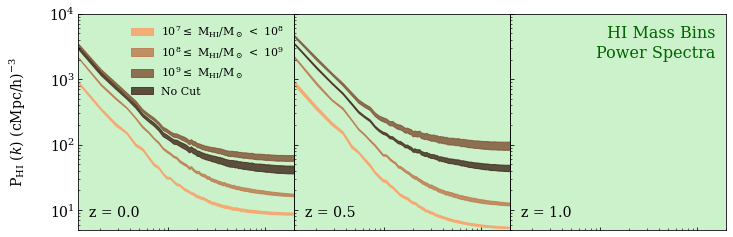

In [8]:
BINCOL = 'limegreen'
THCOL = 'deeppink'
STATCOL = 'skyblue'
ip = {'fieldname':'hisubhalo', 'HI_res':['diemer', 'low-bin', 'mid-bin', 'high-bin'],
     'is_auto':True, 'censat':['no key found', None, 'both'], 'sim_resolution':'high', 'space':'real',
     'grid_resolution':800, 'path':['fiducial', 'HIbt'], 'snapshot':[99, 67, 50], 'simname':'tng100'}
abfg = ds.figrid('HI_res', '', 'snapshot', ip)
abfg.plotArgs('diemer', {'label':'No Cut'})
abfg.autoFill({'alpha':0.8})
abfg.gspecArgs(wspace = 0, yborder = [0.05, 0.05])
abfg.setYLabel(pplib.pklab('HI'), fontsize = 14)
abfg.colLabels(pos = [0.05, 0.05])
abfg.colLabelArgs(ha = 'left', va = 'bottom')
abfg.setDefaultTicksParams()
abfg.tickArgs(labelbottom = False)
abfg.axisArgs(ylim = (5, 1e4), facecolor = pplib.rgba(BINCOL, 0.25))
abfg.legendArgs(fontsize = 11, slc = (0, 0), loc = 'upper right')
abfg.annotatePanel('HI Mass Bins\nPower Spectra', [0.95, 0.95], (0, 2), color = 'darkgreen', 
                ha = 'right', va = 'top', fontsize = 16)
    
abfg.plot()


{'fieldname': 'hisubhalo', 'bin': 'low-bin', 'threshold': 'None', 'snapshot': 67}
[ 69725. 105880.]
{'fieldname': 'hisubhalo', 'bin': 'mid-bin', 'threshold': 'None', 'snapshot': 67}
[42614. 57141.]
{'fieldname': 'hisubhalo', 'bin': 'high-bin', 'threshold': 'None', 'snapshot': 67}
[21369. 15263.]
{'fieldname': 'hisubhalo', 'bin': 'diemer', 'threshold': 'diemer', 'snapshot': 67}
[152122. 191331.]


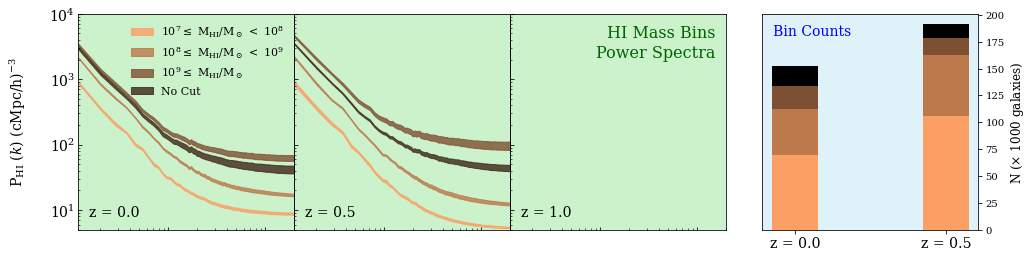

In [9]:
ax = setAx(abfg, 0, 0.5)
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')
ax.set(facecolor = pplib.rgba(STATCOL, 0.25))
ax.tick_params(which = 'both', axis = 'x', labelsize = 14)
ax.set_ylabel('N ($\\times$ 1000 galaxies)', fontsize = 12)
ip = {'fieldname':'hisubhalo', 'bin':'low-bin', 'threshold':'None'}
low = data(ip, median = True)
width = 0.3
labels = ['z = 0.0', 'z = 0.5']
ax.bar(labels, low/1e3, width, color = extractColor('low-bin', abfg, (0,0)))
ip['bin'] = 'mid-bin'
mid = data(ip, median = True)
ax.bar(labels, mid/1e3, width, bottom = low/1e3, color = extractColor('mid-bin', abfg, (0,0)))
ip['bin'] = 'high-bin'
high = data(ip, median = True)
ax.bar(labels, high/1e3, width, bottom = (mid + low)/1e3, color = extractColor('high-bin', abfg, (0,0)))
ip['bin'] = 'diemer'; ip['threshold'] = 'diemer'
totals = data(ip, median = True)
leftover = totals - low - mid - high
ax.bar(labels, leftover/1e3, width, bottom = (high + mid + low)/1e3, color = 'black')
ax.text(0.05, 0.95, 'Bin Counts', transform = ax.transAxes, color = 'blue',
       fontsize = 14, va = 'top', ha = 'left')
abfg.fig

The row values for : ['no key found']
The column values for snapshot: [99, 67, 50]


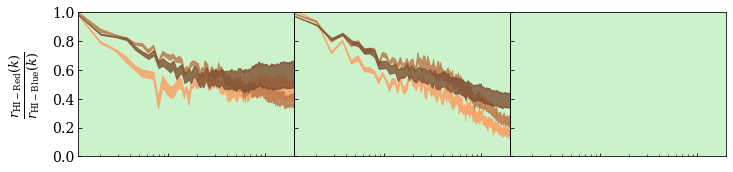

In [10]:
ip = {'path':'HIbt', 'censat':'both', 'HI_res':['low-bin', 'mid-bin', 'high-bin'],
     'is_auto':False, 'post_process':'corr_ratio', 'HI_fieldname':'hisubhalo', 'space':'real', 'snapshot':[99, 67, 50],
     'simname':'tng100'}
rbfg = ds.figrid("HI_res", '', 'snapshot', ip)
rbfg.autoFill(alpha = 0.8)
rbfg.gspecArgs(wspace = 0, yborder = [0.05, 0.25])
rbfg.setPanelsize(3, 2)
rbfg.axisArgs(yscale = 'linear', ylim = (0,1), facecolor = pplib.rgba(BINCOL, 0.25))
# fg.setXLabel(XLAB)
rbfg.setYLabel(pplib.ccrat("HI-Red", "HI-Blue", frac = True), fontsize = 18)
rbfg.legendArgs(rm_legend = True)
rbfg.setDefaultTicksParams()
rbfg.colLabels(['']*3)
# fg.annotatePanel('Galaxy Correlations\nBy HI Mass Bins', [0.95, 0.95], (0, 3), color = 'forestgreen', 
#                 ha = 'right', va = 'top', fontsize = 16)
rbfg.tickArgs(labelbottom = False)
rbfg.plot()

The row values for : ['no key found']
The column values for snapshot: [99, 67, 50]


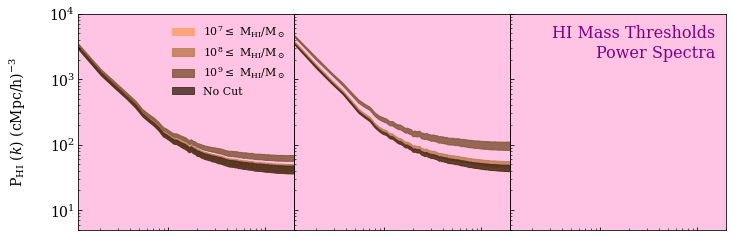

In [11]:
ip = {'fieldname':'hisubhalo', 'HI_res':['diemer', 'low-threshold', 'mid-threshold', 'high-threshold'],
     'is_auto':True, 'censat':['no key found', None, 'both'], 'sim_resolution':'high', 'space':'real',
     'grid_resolution':800, 'path':['fiducial', 'HIbt'], 'snapshot':[99, 67, 50], 'simname':'tng100'}
atfg = ds.figrid('HI_res', '', 'snapshot', ip)
atfg.plotArgs('diemer', {'label':'No Cut'})
atfg.autoFill({'alpha':0.8})
atfg.gspecArgs(wspace = 0, yborder = [0.05, 0.05])
atfg.setYLabel(pplib.pklab('HI'), fontsize = 14)
atfg.colLabels(['']*3)
atfg.colLabels(pos = [0.05, 0.05])
atfg.colLabelArgs(ha = 'left', va = 'bottom')
loopthreshs = threshs + ['diemer']
atfg.setDefaultTicksParams()
atfg.tickArgs(labelbottom = False)
atfg.axisArgs(ylim = (5, 1e4), facecolor = pplib.rgba(THCOL, 0.25))
# atfg.legendArgs(fontsize = 13, slc = (0, 0), loc = [3.15, 0.25], title = 'HI Mass Thresholds')
atfg.legendArgs(fontsize = 11, slc = (0,0), loc = 'upper right')
atfg.annotatePanel('HI Mass Thresholds\nPower Spectra', [0.95, 0.95], (0, 2), color = 'purple', 
                ha = 'right', va = 'top', fontsize = 16)
atfg.plot()


The row values for : ['no key found']
The column values for : ['no key found']


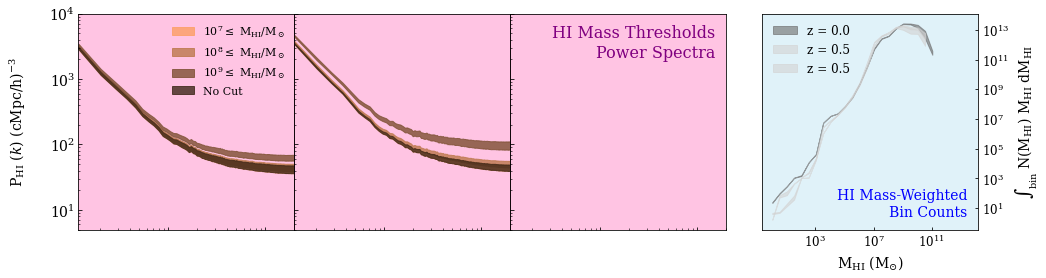

In [12]:
def histFill(ax, data, kwargs):
    x = data[0]
    mins = data[1]
    maxs = data[2]
    zmask = np.nonzero(mins)
    ax.fill_between(x[zmask], mins[zmask], maxs[zmask], **kwargs)
    return

ax = setAx(atfg, 0, 0.5)
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')
hists = {'is_hist':True, 'is_hydrogen':True, 'fieldname':'hisubhalo'}
fg = gdds.figrid('snapshot', '', '', hists)
fg.axisArgs(yscale = 'log', xscale = 'log', facecolor = pplib.rgba(STATCOL, 0.25))
fg.plotArgs(99, label = 'z = 0.0', color = 'dimgrey')
fg.plotArgs(67, label = 'z = 0.5', color = 'lightgrey')
fg.autoFill(alpha = 0.6)
fg.setFunc({'figrid_process':'fill'}, histFill)
fg.legendArgs(frameon = False, fontsize = 12)
fg.tickArgs(labelsize = 12, direction = 'in')
fg.annotatePanel('HI Mass-Weighted\nBin Counts', (0.95, 0.05), (0,0),
                 color = 'blue', fontsize = 14, ha = 'right', va = 'bottom')
ax.set_ylabel(r"$\int_{\mathrm{bin}}$ N(M$_{\mathrm{HI}}$) M$_{\mathrm{HI}}$ dM$_{\mathrm{HI}}$",
             fontsize = 14)
ax.set_xlabel(r"M$_{\mathrm{HI}}$ (M$_{\odot}$)", fontsize = 14)
axarr = np.array([ax], ndmin = 2, dtype = object)
fg.plot(atfg.fig, axes = axarr)
atfg.fig

The row values for : ['no key found']
The column values for snapshot: [99, 67, 50]


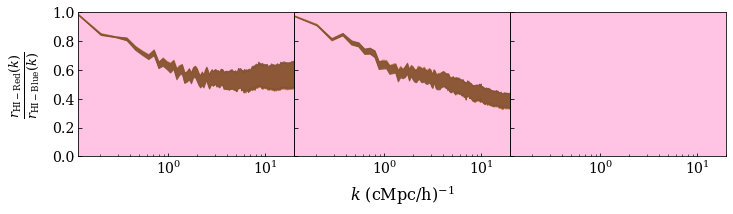

In [13]:
ip = {'path':'HIbt', 'censat':'both', 'HI_res':['low-threshold', 'mid-threshold', 'high-threshold'],
     'is_auto':False, 'post_process':'corr_ratio', 'HI_fieldname':'hisubhalo', 'space':'real', 'snapshot':[99, 67, 50],
     'simname':'tng100'}
rtfg = ds.figrid("HI_res", '', 'snapshot', ip)
rtfg.autoFill(alpha = 0.8)
rtfg.gspecArgs(wspace = 0, yborder = [0.05, 0.35])
rtfg.setPanelsize(3, 2)
rtfg.axisArgs(yscale = 'linear', ylim = (0,1), facecolor = pplib.rgba(THCOL, 0.25))
rtfg.setXLabel(pplib.wnum())
rtfg.setYLabel(pplib.ccrat("HI-Red", "HI-Blue", frac = True), fontsize = 18)
rtfg.legendArgs(rm_legend = True)
rtfg.setDefaultTicksParams()
rtfg.colLabels(['']*3)
rtfg.plot()

{'fieldname': 'hisubhalo', 'bin': 'low-bin', 'threshold': 'None', 'snapshot': 67}
[ 69725. 105880.]
{'fieldname': 'hisubhalo', 'bin': 'mid-bin', 'threshold': 'None', 'snapshot': 67}
[42614. 57141.]
{'fieldname': 'hisubhalo', 'bin': 'high-bin', 'threshold': 'None', 'snapshot': 67}
[21369. 15263.]
{'fieldname': 'hisubhalo', 'bin': 'diemer', 'threshold': 'diemer', 'snapshot': 67}
[152122. 191331.]
The row values for : ['no key found']
The column values for : ['no key found']


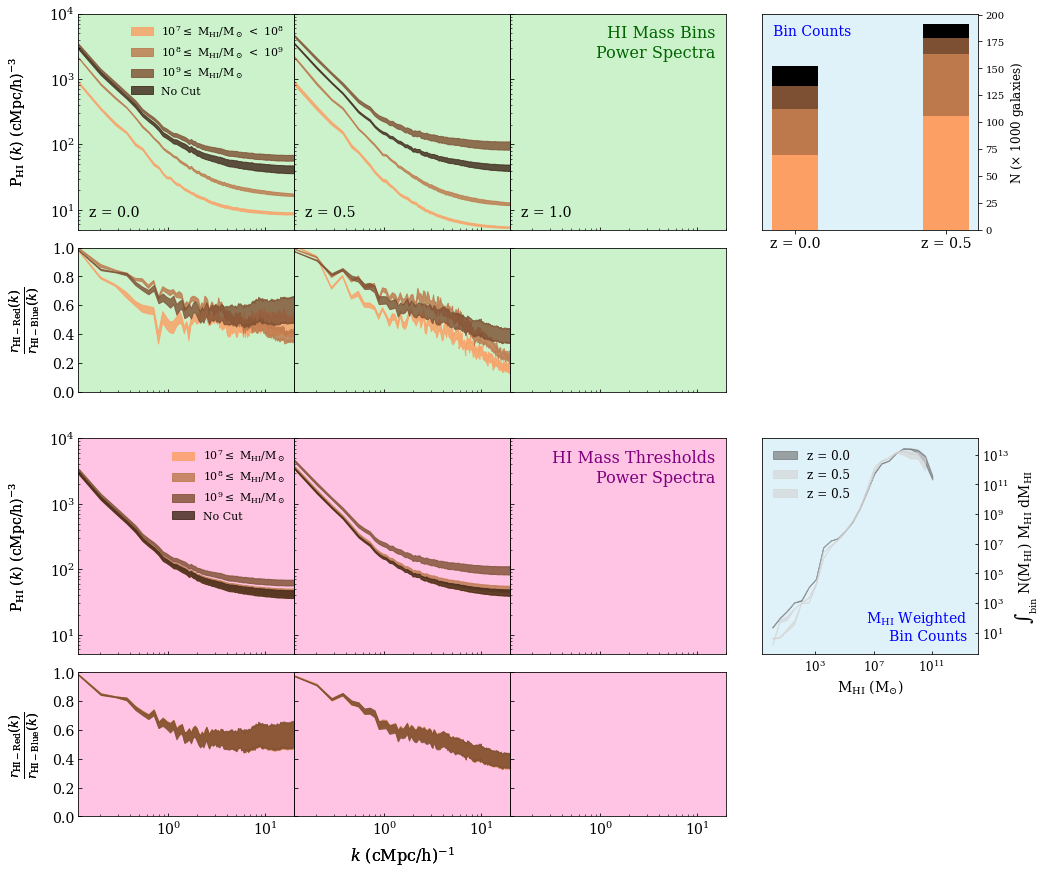

In [14]:
figarr = np.empty((4, 1), dtype = object)
figarr[:, 0] = [abfg, rbfg, atfg, rtfg]
fig = abfg.combine(figarr)

ax = setAx(abfg, 0, 0.5)
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')
ax.set(facecolor = pplib.rgba(STATCOL, 0.25))
ax.tick_params(which = 'both', axis = 'x', labelsize = 14)
ax.set_ylabel('N ($\\times$ 1000 galaxies)', fontsize = 12)
ip = {'fieldname':'hisubhalo', 'bin':'low-bin', 'threshold':'None'}
low = data(ip, median = True)
width = 0.3
labels = ['z = 0.0', 'z = 0.5']
ax.bar(labels, low/1e3, width, color = extractColor('low-bin', abfg, (0,0)))
ip['bin'] = 'mid-bin'
mid = data(ip, median = True)
ax.bar(labels, mid/1e3, width, bottom = low/1e3, color = extractColor('mid-bin', abfg, (0,0)))
ip['bin'] = 'high-bin'
high = data(ip, median = True)
ax.bar(labels, high/1e3, width, bottom = (mid + low)/1e3, color = extractColor('high-bin', abfg, (0,0)))
ip['bin'] = 'diemer'; ip['threshold'] = 'diemer'
totals = data(ip, median = True)
leftover = totals - low - mid - high
ax.bar(labels, leftover/1e3, width, bottom = (high + mid + low)/1e3, color = 'black')
ax.text(0.05, 0.95, 'Bin Counts', transform = ax.transAxes, color = 'blue',
       fontsize = 14, va = 'top', ha = 'left')

def histFill(ax, data, kwargs):
    x = data[0]
    mins = data[1]
    maxs = data[2]
    zmask = np.nonzero(mins)
    ax.fill_between(x[zmask], mins[zmask], maxs[zmask], **kwargs)
    return

ax = setAx(atfg, 0, 0.5)
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')
hists = {'is_hist':True, 'is_hydrogen':True, 'fieldname':'hisubhalo'}
fg = gdds.figrid('snapshot', '', '', hists)
fg.axisArgs(yscale = 'log', xscale = 'log', facecolor = pplib.rgba(STATCOL, 0.25))
fg.plotArgs(99, label = 'z = 0.0', color = 'dimgrey')
fg.plotArgs(67, label = 'z = 0.5', color = 'lightgrey')
fg.autoFill(alpha = 0.6)
fg.setFunc({'figrid_process':'fill'}, histFill)
fg.legendArgs(frameon = False, fontsize = 12)
fg.tickArgs(labelsize = 12, direction = 'in')
fg.annotatePanel('M$_{\\mathrm{HI}}$ Weighted\nBin Counts', (0.95, 0.05), (0,0),
                 color = 'blue', fontsize = 14, ha = 'right', va = 'bottom')
ax.set_ylabel(r"$\int_{\mathrm{bin}}$ N(M$_{\mathrm{HI}}$) M$_{\mathrm{HI}}$ dM$_{\mathrm{HI}}$",
             fontsize = 14)
ax.set_xlabel(r"M$_{\mathrm{HI}}$ (M$_{\odot}$)", fontsize = 14)
axarr = np.array([ax], ndmin = 2, dtype = object)
fg.plot(atfg.fig, axes = axarr)

# fig.savefig("HIbt_colors_snapshotC.png", bbox_inches = 'tight')
# fig.savefig("/Users/cosinga/code/hicolor_draft/figures/HIbt_colors_snapshotC.pdf", bbox_inches = 'tight')

# Making Stmass thresholds/bins figures

The row values for color: ['blue', 'red', 'resolved']
The column values for snapshot: [99, 67, 50]


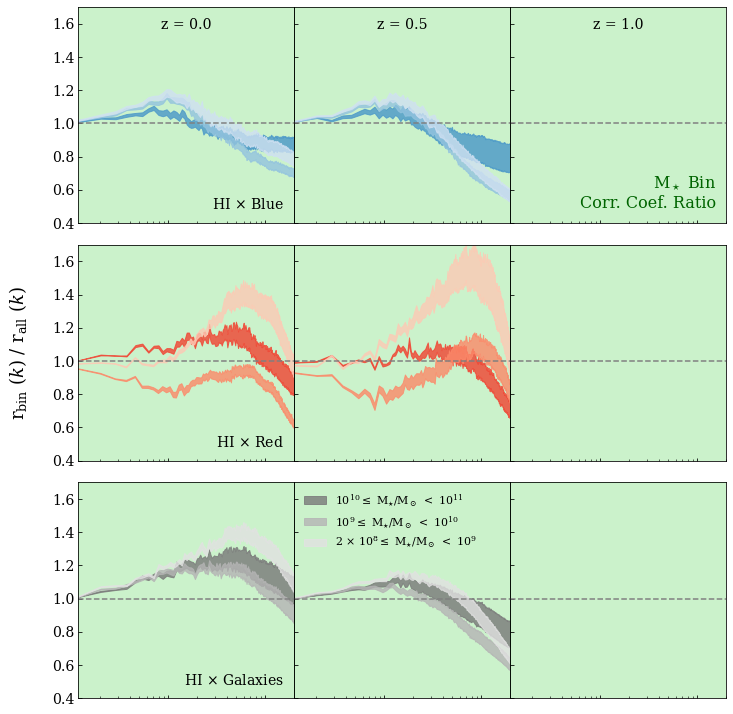

In [87]:
import seaborn
import copy
import matplotlib.pyplot as plt

ip = {'is_auto':False, 'censat':['no key found', None, 'both'], 'sim_resolution':'high', 'space':'real',
     'grid_resolution':800, 'path':['galbt', 'fiducial'], 'gal_res':bins + ['diemer'], 'color':['blue', 'red', 'resolved'],
     'color_cut':['0.60', 'None'], 'post_process':'corr_coef', 'HI_fieldname':'hisubhalo', 'snapshot':[99, 67, 50],
     'simname':'tng100'}
bfg = ds.figrid('gal_res', 'color', 'snapshot', ip)
bfg.autoNorm({'gal_res':'diemer'}, must_match =['model', 'color'])
gal_res = ip['gal_res'][:3]
cmaps = {}
cmaps['blue'] = seaborn.color_palette('Blues', len(gal_res) + 1)
cmaps['red'] = seaborn.color_palette('Reds', len(gal_res)+ 1)
cmaps['resolved'] = seaborn.color_palette('Greys', len(gal_res) + 1)

loopbins = bins + ['diemer']
for c in ip['color']:
    bfg.setCmap(cmaps[c][:3] + [pplib.rgba('black', .6)], loopbins, {'color':c})
bfg.plotArgs('diemer', label = 'No Cut')
bfg.setYLabel(pplib.ccrat('bin', 'all'))
bfg.setDefaultTicksParams()
bfg.tickArgs(labelbottom = False)
bfg.rowLabels(pos = (0.95, 0.05))
bfg.rowLabelArgs(ha = 'right')
bfg.gspecArgs(wspace = 0, hspace = 0.1, yborder = [0, 0.25])
bfg.legendArgs(loc = 'upper left', slc = (2, 1), fontsize = 11)
bfg.axisArgs(yscale = 'linear', ylim = (0.4, 1.7), facecolor = pplib.rgba(BINCOL, 0.25))
bfg.autoFill(alpha = 0.8)
bfg.annotatePanel('M$_\\star$ Bin\nCorr. Coef. Ratio', [0.95, 0.05], (0, 2), color = 'darkgreen', 
                ha = 'right', va = 'bottom', fontsize = 16)

rbins = copy.deepcopy(bins)
rbins.reverse()
bfg.plotOrder(rbins)
bfg.plotOnes()
bfg.plot()


{'fieldname': 'galaxy', 'bin': 'low-bin', 'threshold': 'None', 'color': 'blue', 'snapshot': 67}
[13781. 18087.]
{'fieldname': 'galaxy', 'bin': 'mid-bin', 'threshold': 'None', 'color': 'blue', 'snapshot': 67}
[12143. 13277.]
{'fieldname': 'galaxy', 'bin': 'high-bin', 'threshold': 'None', 'color': 'blue', 'snapshot': 67}
[3354. 4285.]
{'fieldname': 'galaxy', 'bin': 'diemer', 'threshold': 'diemer', 'color': 'blue', 'snapshot': 67}
[29376. 35996.]
{'fieldname': 'galaxy', 'bin': 'low-bin', 'threshold': 'None', 'color': 'red', 'snapshot': 67}
[6878. 3264.]
{'fieldname': 'galaxy', 'bin': 'mid-bin', 'threshold': 'None', 'color': 'red', 'snapshot': 67}
[3904. 1595.]
{'fieldname': 'galaxy', 'bin': 'high-bin', 'threshold': 'None', 'color': 'red', 'snapshot': 67}
[2459. 1111.]
{'fieldname': 'galaxy', 'bin': 'diemer', 'threshold': 'diemer', 'color': 'red', 'snapshot': 67}
[13837.  6207.]
{'fieldname': 'galaxy', 'bin': 'low-bin', 'threshold': 'None', 'color': 'resolved', 'snapshot': 67}
[20659. 2135

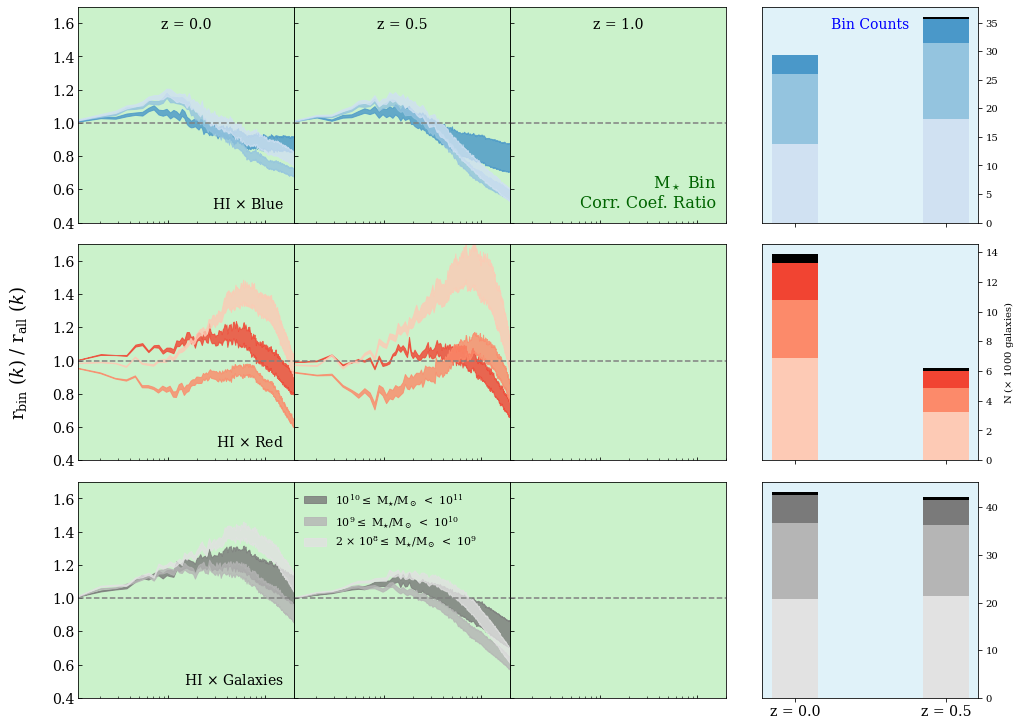

In [88]:
cols = ['blue', 'red', 'resolved']
for row in range(bfg.dim[0]):
    ax = setAx(bfg, row, 0.5)
    if row == 0:
        ax.text(0.5, 0.95, 'Bin Counts', transform = ax.transAxes, color = 'blue',
           fontsize = 14, va = 'top', ha = 'center')
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position('right')
    ax.set(facecolor = pplib.rgba(STATCOL, 0.25))
    ax.tick_params(which = 'both', axis = 'x', labelsize = 14)
    ip = {'fieldname':'galaxy', 'bin':'low-bin', 'threshold':'None', 'color':cols[row]}
    low = data(ip, median = True)
    width = 0.3
    if row == 2:
        labels = ['z = 0.0', 'z = 0.5']
    else:
        labels = [' ', '  ']
    
    if row == 1:
        ax.set_ylabel('N ($\\times$ 1000 galaxies)')
    ax.bar(labels, low/1e3, width, color = extractColor('low-bin', bfg, (row,0)))
    ip['bin'] = 'mid-bin'
    mid = data(ip, median = True)
    ax.bar(labels, mid/1e3, width, bottom = low/1e3, color = extractColor('mid-bin', bfg, (row,0)))
    ip['bin'] = 'high-bin'
    high = data(ip, median = True)
    ax.bar(labels, high/1e3, width, bottom = (mid + low)/1e3, color = extractColor('high-bin', bfg, (row,0)))
    ip['bin'] = 'diemer'
    ip['threshold'] = 'diemer'
    diemer = data(ip, median = True)
    leftover = diemer - low - high - mid
    ax.bar(labels, leftover/1e3, width, bottom = (high + mid + low)/1e3, color = 'black')
ip['bin'] = 'None'
ip['threshold'] = 'low-threshold'
lowth = data(ip, median = True)
bfg.save('galaxy_bins.png')
bfg.save('/Users/cosinga/code/hicolor_draft/figures/galaxy_bins.pdf')
bfg.fig

The row values for color: ['blue', 'red', 'resolved']
The column values for snapshot: [99, 67, 50]


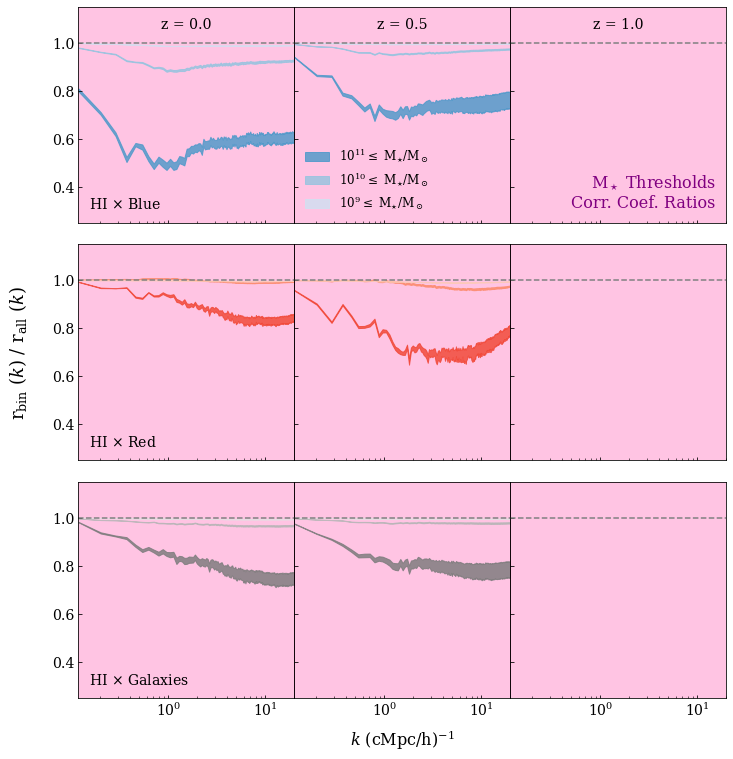

In [89]:
ip = {'is_auto':False, 'censat':['no key found', None, 'both'], 'sim_resolution':'high', 'space':'real',
     'grid_resolution':800, 'path':['galbt', 'fiducial'], 'gal_res':threshs + ['diemer'], 'color':['blue', 'red', 'resolved'],
     'color_cut':['0.60', 'None'], 'post_process':'corr_coef', 'HI_fieldname':'hisubhalo', 'snapshot':[99, 67, 50]}
fg = ds.figrid('gal_res', 'color', 'snapshot', ip)
fg.autoNorm({'gal_res':'diemer'}, must_match = ['model', 'color'])
gal_res = ip['gal_res'][:3]
cmaps = {}
cmaps['blue'] = seaborn.color_palette('Blues', len(gal_res) + 1)
cmaps['red'] = seaborn.color_palette('Reds', len(gal_res)+ 1)
cmaps['resolved'] = seaborn.color_palette('Greys', len(gal_res) + 1)

loopth = threshs + ['diemer']
for c in ip['color']:
    fg.setCmap(cmaps[c][:3] + [pplib.rgba('black', .6)], loopth, {'color':c})
# fg.setYLabel(ccrat('Thresh', 'Fid.'))
fg.setXLabel(pplib.wnum())
fg.setYLabel(pplib.ccrat('bin', 'all'))
fg.setDefaultTicksParams()
fg.gspecArgs(wspace = 0, hspace = 0.1)
fg.legendArgs(loc = 'lower left', slc = (0, 1))
fg.axisArgs(yscale = 'linear', ylim = (0.25, 1.15), facecolor = pplib.rgba(THCOL, 0.25))
fg.autoFill(alpha = 0.8)
rbins = copy.deepcopy(threshs)
rbins.reverse()
fg.annotatePanel('M$_\\star$ Thresholds\nCorr. Coef. Ratios', [0.95, 0.05], (0, 2), color = 'purple', 
                ha = 'right', va = 'bottom', fontsize = 16)
fg.plotOrder(['diemer']+rbins)
fg.plotOnes()
fg.plot()

The row values for snapshot: [99]
The column values for : ['no key found']
The row values for snapshot: [67]
The column values for : ['no key found']
The row values for snapshot: [50]
The column values for : ['no key found']


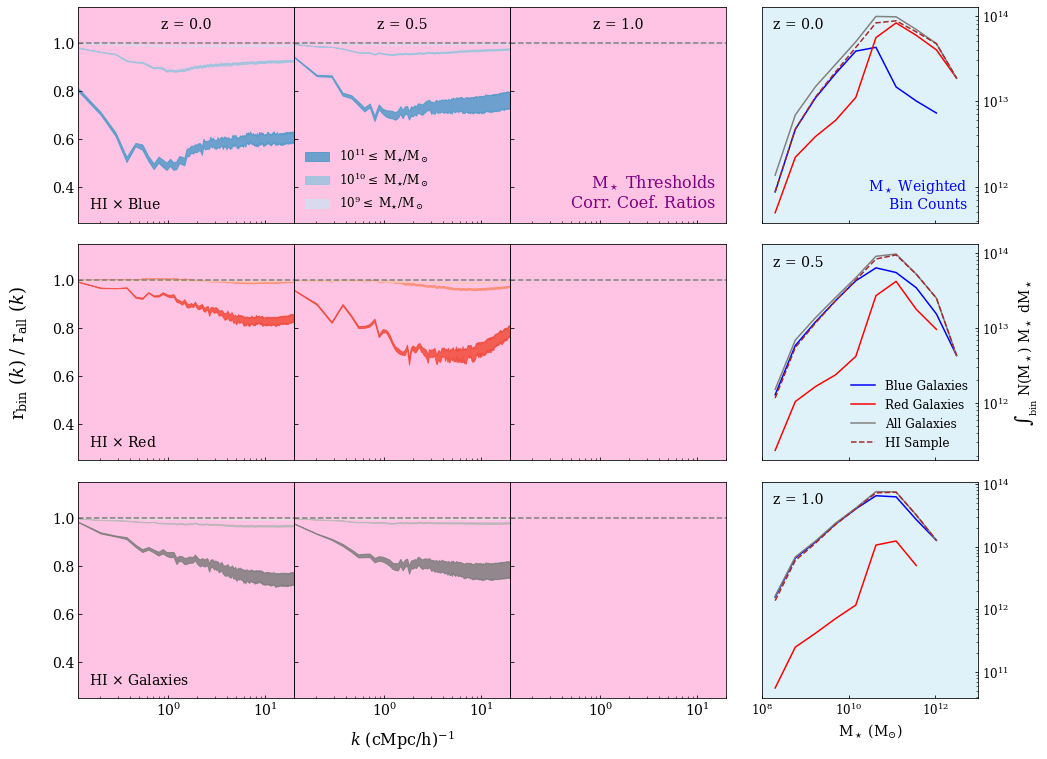

In [90]:
def hist(ax, data, kwargs):
    x = data[0]
    mins = data[1]
    zmask = np.nonzero(mins)
    ax.plot(x[zmask], mins[zmask], **kwargs)
    return
cols = ['blue', 'red', 'resolved']
snapshots = [99, 67, 50]
sslabels = ['z = 0.0', 'z = 0.5', 'z = 1.0']

for row in range(len(snapshots)):
    ax = setAx(fg, row, 0.5)
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position('right')
    hists = {'is_hist':True, 'snapshot':snapshots[row], 
             'fieldname':['galaxy', 'hisubhalo'], 'censat':'both'}
    mfg = gdds.figrid('color', 'snapshot', '', hists, rm_attrs = {'is_hydrogen':True})
    mfg.axisArgs(yscale = 'log', xscale = 'log', xlim = (1e8, 1e13), facecolor = pplib.rgba(STATCOL, 0.25))
    mfg.plotArgs('red', label = 'Red Galaxies', color = 'red')
    mfg.plotArgs('blue', label = 'Blue Galaxies', color = 'blue')
    mfg.plotArgs('resolved', label = 'All Galaxies', color = 'gray')
    mfg.plotArgs('no key found', label = 'HI Sample', color = 'brown', linestyle = 'dashed')
    mfg.rowLabels([sslabels[row]], pos = (0.05, 0.95))
    mfg.rowLabelArgs(va = 'top', ha = 'left', fontsize = 14)
    mfg.setFunc({}, hist)
    
    mfg.tickArgs(labelsize = 12, direction = 'in')
    if row == len(snapshots) - 1:
        ax.set_xlabel(r"M$_\star$ (M$_{\odot}$)", fontsize = 14)
    else:
        mfg.tickArgs(labelbottom = False)
    
    if row == 1:
        ax.set_ylabel(r"$\int_{\mathrm{bin}}$ N(M$_\star$) M$_\star$ dM$_\star$",
             fontsize = 14)
        mfg.legendArgs(frameon = False, loc = 'lower right', fontsize = 12)
    else:
        mfg.legendArgs(rm_legend = True)

    if row == 0:
        mfg.annotatePanel('M$_\\star$ Weighted\nBin Counts', (0.95, 0.05), (0,0),
                color = 'blue', fontsize = 14, ha = 'right', va = 'bottom')
    axarr = np.array([ax], ndmin = 2, dtype = object)
    mfg.plot(fg.fig, axes = axarr)
# fg.save('galaxy_thresholds.png')
# fg.save('/Users/cosinga/code/hicolor_draft/figures/galaxy_thresholds.pdf')
fg.fig

{'fieldname': 'galaxy', 'bin': 'low-bin', 'threshold': 'None', 'color': 'blue', 'snapshot': 67}
[13781. 18087.]
{'fieldname': 'galaxy', 'bin': 'mid-bin', 'threshold': 'None', 'color': 'blue', 'snapshot': 67}
[12143. 13277.]
{'fieldname': 'galaxy', 'bin': 'high-bin', 'threshold': 'None', 'color': 'blue', 'snapshot': 67}
[3354. 4285.]
{'fieldname': 'galaxy', 'bin': 'diemer', 'threshold': 'diemer', 'color': 'blue', 'snapshot': 67}
[29376. 35996.]
[ 98. 347.]
{'fieldname': 'galaxy', 'bin': 'low-bin', 'threshold': 'None', 'color': 'red', 'snapshot': 67}
[6878. 3264.]
{'fieldname': 'galaxy', 'bin': 'mid-bin', 'threshold': 'None', 'color': 'red', 'snapshot': 67}
[3904. 1595.]
{'fieldname': 'galaxy', 'bin': 'high-bin', 'threshold': 'None', 'color': 'red', 'snapshot': 67}
[2459. 1111.]
{'fieldname': 'galaxy', 'bin': 'diemer', 'threshold': 'diemer', 'color': 'red', 'snapshot': 67}
[13837.  6207.]
[596. 237.]
{'fieldname': 'galaxy', 'bin': 'low-bin', 'threshold': 'None', 'color': 'resolved', 'sna

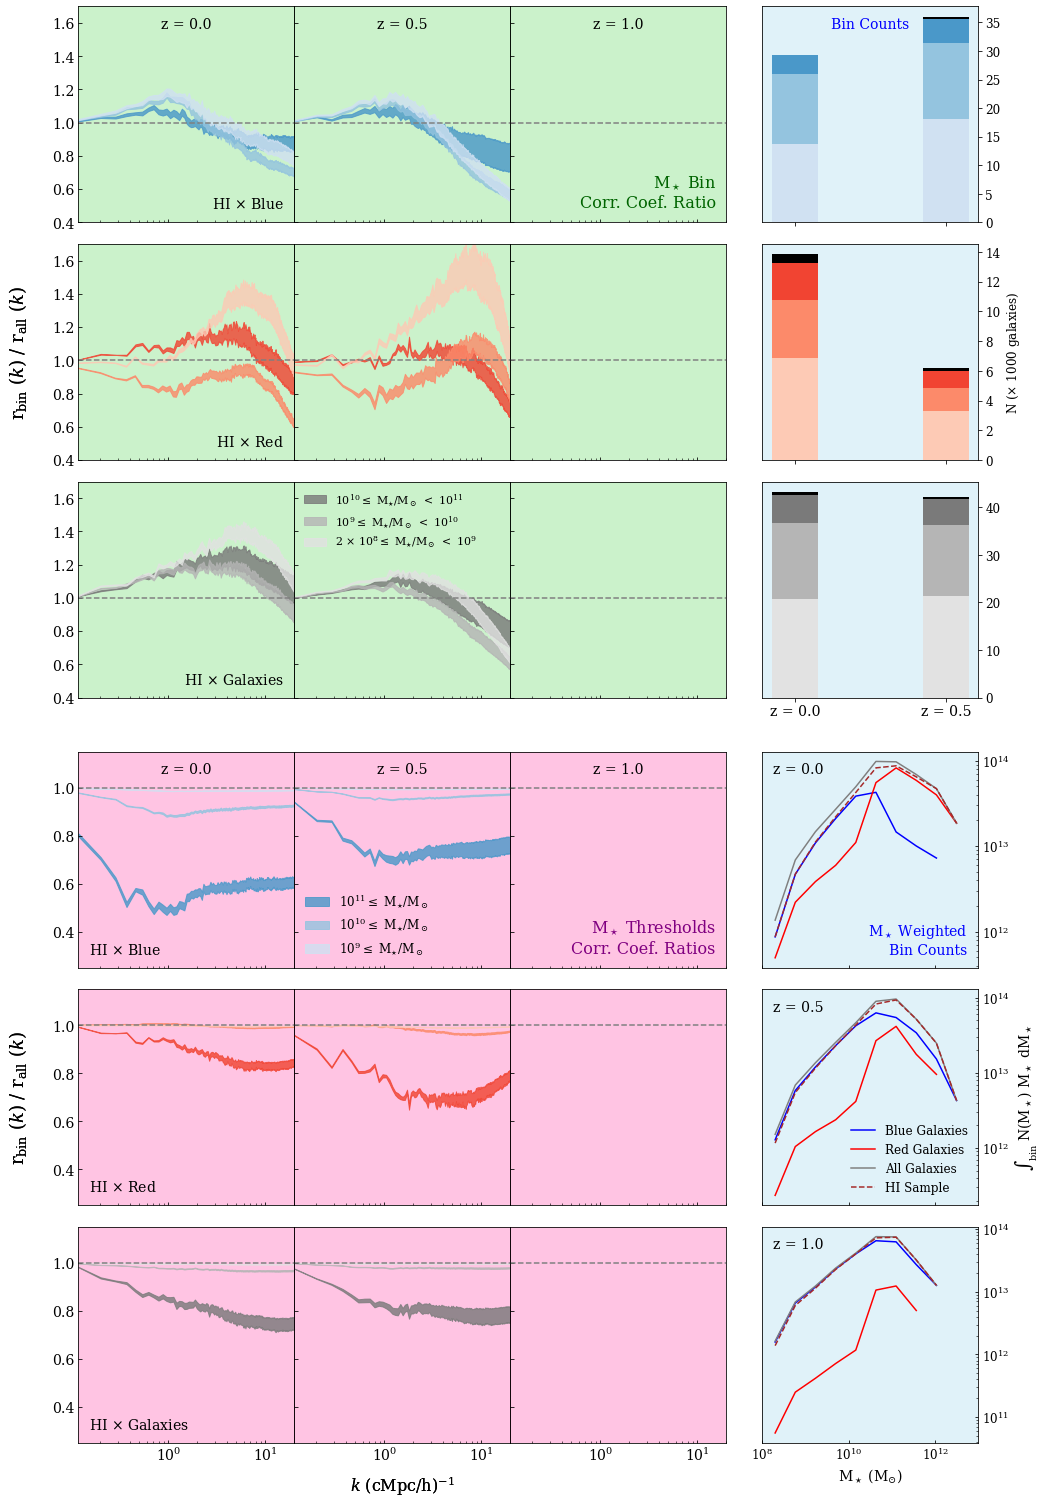

In [91]:
figarr = np.empty((2, 1), dtype = object)
figarr[:, 0]= [bfg, fg]
fig = bfg.combine(figarr)

cols = ['blue', 'red', 'resolved']
for row in range(bfg.dim[0]):
    ax = setAx(bfg, row, 0.5)
    if row == 0:
        ax.text(0.5, 0.95, 'Bin Counts', transform = ax.transAxes, color = 'blue',
           fontsize = 14, va = 'top', ha = 'center')
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position('right')
    ax.set(facecolor = pplib.rgba(STATCOL, 0.25))
    ax.tick_params(which = 'both', axis = 'x', labelsize = 14)
    ax.tick_params(which = 'both', axis = 'y', labelsize = 12)
    ip = {'fieldname':'galaxy', 'bin':'low-bin', 'threshold':'None', 'color':cols[row]}
    low = data(ip, median = True)
    width = 0.3
    if row == 2:
        labels = ['z = 0.0', 'z = 0.5']
    else:
        labels = [' ', '  ']
    
    if row == 1:
        ax.set_ylabel('N ($\\times$ 1000 galaxies)', fontsize = 12)
    ax.bar(labels, low/1e3, width, color = extractColor('low-bin', bfg, (row,0)))
    ip['bin'] = 'mid-bin'
    mid = data(ip, median = True)
    ax.bar(labels, mid/1e3, width, bottom = low/1e3, color = extractColor('mid-bin', bfg, (row,0)))
    ip['bin'] = 'high-bin'
    high = data(ip, median = True)
    ax.bar(labels, high/1e3, width, bottom = (mid + low)/1e3, color = extractColor('high-bin', bfg, (row,0)))
    ip['bin'] = 'diemer'
    ip['threshold'] = 'diemer'
    diemer = data(ip, median = True)
    leftover = diemer - low - high - mid
    print(leftover)
    ax.bar(labels, leftover/1e3, width, bottom = (high + mid + low)/1e3, color = 'black')
ip['bin'] = 'None'
ip['threshold'] = 'low-threshold'
lowth = data(ip, median = True)

def hist(ax, data, kwargs):
    x = data[0]
    mins = data[1]
    zmask = np.nonzero(mins)
    ax.plot(x[zmask], mins[zmask], **kwargs)
    return
cols = ['blue', 'red', 'resolved']
snapshots = [99, 67, 50]
sslabels = ['z = 0.0', 'z = 0.5', 'z = 1.0']

for row in range(len(snapshots)):
    ax = setAx(fg, row, 0.5)
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position('right')
    hists = {'is_hist':True, 'snapshot':snapshots[row], 
             'fieldname':['galaxy', 'hisubhalo'], 'censat':'both'}
    mfg = gdds.figrid('color', 'snapshot', '', hists, rm_attrs = {'is_hydrogen':True})
    mfg.axisArgs(yscale = 'log', xscale = 'log', xlim = (1e8, 1e13), facecolor = pplib.rgba(STATCOL, 0.25))
    mfg.plotArgs('red', label = 'Red Galaxies', color = 'red')
    mfg.plotArgs('blue', label = 'Blue Galaxies', color = 'blue')
    mfg.plotArgs('resolved', label = 'All Galaxies', color = 'gray')
    mfg.plotArgs('no key found', label = 'HI Sample', color = 'brown', linestyle = 'dashed')
    mfg.rowLabels([sslabels[row]], pos = (0.05, 0.95))
    mfg.rowLabelArgs(va = 'top', ha = 'left', fontsize = 14)
    mfg.setFunc({}, hist)
    
    mfg.tickArgs(labelsize = 12, direction = 'in')
    if row == len(snapshots) - 1:
        ax.set_xlabel(r"M$_\star$ (M$_{\odot}$)", fontsize = 14)
    else:
        mfg.tickArgs(labelbottom = False)
    
    if row == 1:
        ax.set_ylabel(r"$\int_{\mathrm{bin}}$ N(M$_\star$) M$_\star$ dM$_\star$",
             fontsize = 14)
        mfg.legendArgs(frameon = False, loc = 'lower right', fontsize = 12)
    else:
        mfg.legendArgs(rm_legend = True)

    if row == 0:
        mfg.annotatePanel('M$_\\star$ Weighted\nBin Counts', (0.95, 0.05), (0,0),
                color = 'blue', fontsize = 14, ha = 'right', va = 'bottom')
    axarr = np.array([ax], ndmin = 2, dtype = object)
    mfg.plot(fg.fig, axes = axarr)


fig.savefig("/Users/cosinga/code/hicolor_draft/figures/stmass_binth_snapshotC.pdf", bbox_inches = 'tight')
fig.savefig("stmass_binth_snapshotC.png", bbox_inches = 'tight')

The row values for : ['no key found']
The column values for : ['no key found']


IndexError: list index out of range

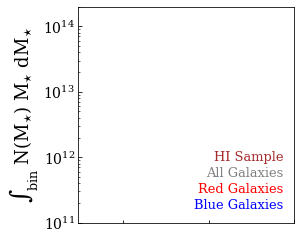

In [92]:
ip = {'is_hist':True, 'fieldname':'galaxy', 'is_hydrogen':False, 'censat':'both'}
def coolplot(ax, data, args):
    new_args = copy.deepcopy(args)
    cmaps['blue'] = seaborn.color_palette('Blues', 4)
    cmaps['red'] = seaborn.color_palette('Reds', 4)
    cmaps['gray'] = seaborn.color_palette('Greys', 4)
    
    cmap = cmaps[args['color']]
    idx = [0, 3, 5, len(data[0])]
    for i in range(3):
        new_args['color'] = cmap[i + 1]
        if i == 0: 
            x = data[0][idx[i]:idx[i+1]]
            y = data[1][idx[i]:idx[i+1]]
        else:
            x = data[0][idx[i]-1:idx[i+1]]
            y = data[1][idx[i]-1:idx[i+1]]

        mask = y > 0
        ax.plot(x[mask], y[mask], **new_args)
        ax.scatter([x[mask][0], x[mask][-1]], [y[mask][0], y[mask][-1]], color = new_args['color'])
    return
    
hgfg = ds.figrid('color', '', '', ip)
hgfg.tickArgs(labelbottom = False)

hgfg.gspecArgs(yborder = [0, 0.2])
hgfg.axisLabelArgs('y', fontsize = 14)
hgfg.setYLabel(r"$\int_{\mathrm{bin}}$ N(M$_{\rm{\star}}$) M$_{\rm{\star}}$ dM$_{\rm{\star}}$")
hgfg.setFunc({'is_hist':True}, coolplot)
hgfg.axisArgs(xlim = (9e7, 1e13), ylim = (1e11, 2e14))
texts = ['Blue Galaxies', 'Red Galaxies', 'All Galaxies', 'HI Sample']
colors = ['blue', 'red', 'gray', 'brown']
for i in range(4):
    hgfg.annotatePanel(texts[i], pos = [0.95, 0.05+0.075*i], idx = (0, 0), color = colors[i], fontsize = 13, va = 'bottom', ha = 'right')
hgfg.legendArgs(rm_legend = True)
hgfg.plot()

ip = {'is_hist':True, 'fieldname':'hisubhalo', 'gal_pop':True, 'is_hydrogen':'False'}
hihist = ds.getMatching(ip)[0]
zeromask = hihist.data[1] > 0
hgfg.axes[0,0].plot(hihist.data[0][zeromask], hihist.data[1][zeromask], color = 'brown', linestyle = 'dashed')
# hgfg.save("histogram_galaxies.png")
# hgfg.save(DRAFTPATH + "histogram_galaxies.pdf")

The row values for : ['no key found']
The column values for : ['no key found']


/home/cosinga/figrid/figrid/figrid.py:845: RuntimeWarning: invalid value encountered in true_divide
  dcdata[idx][:] = dcdata[idx][:] / norm[:]


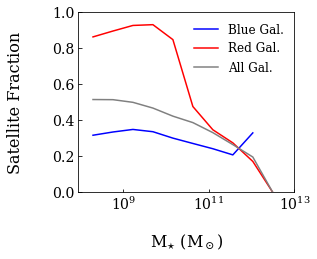

In [14]:
ip = {'is_hist':True, 'fieldname':'galaxy', 'is_hydrogen':False, 'censat':['both', 'satellites']}
fg = ds.figrid('censat', '', '', ip)
fg.autoNorm('both', ['color'])
fg.axisArgs(xlim = (9e7, 1e13), ylim = (0, 1), yscale = 'linear')
fg.plotArgs({'color':'blue'}, color = 'blue', label = 'Blue Gal.')
fg.plotArgs({'color':'red'}, color = 'red', label = 'Red Gal.')
fg.plotArgs({'color':'resolved'}, color = 'gray', label = 'All Gal.')
fg.plotArgs('both', label = '_nolegend_')
fg.setYLabel("Satellite Fraction")
fg.setXLabel(r"M$_{\mathrm{\star}}$ (M$_\odot$)")
fg.setPanelsize(3, 2.5)
fg.plot()

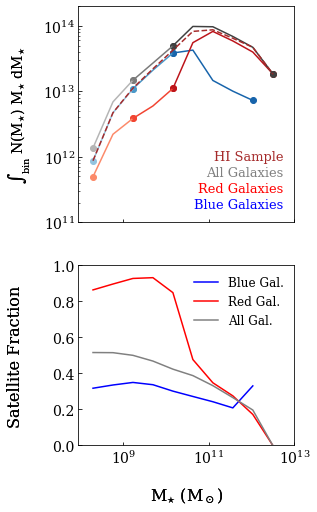

In [15]:
figarr = np.empty((2, 1), dtype = object)
figarr[0,0] = hgfg; figarr[1, 0] = fg

fig = ds.combine(figarr)
ip = {'is_hist':True, 'fieldname':'hisubhalo', 'gal_pop':True, 'is_hydrogen':'False'}
hihist = ds.getMatching(ip)[0]
zeromask = hihist.data[1] > 0
hgfg.axes[0,0].plot(hihist.data[0][zeromask], hihist.data[1][zeromask], color = 'brown', linestyle = 'dashed')
# fig.savefig(DRAFTPATH%"histograms.pdf", bbox_inches ='tight')
# fig.savefig("histograms.png", bbox_inches = 'tight')

The row values for color: ['blue', 'red', 'resolved']
The column values for gal_res: ['low-bin', 'mid-bin', 'high-bin']


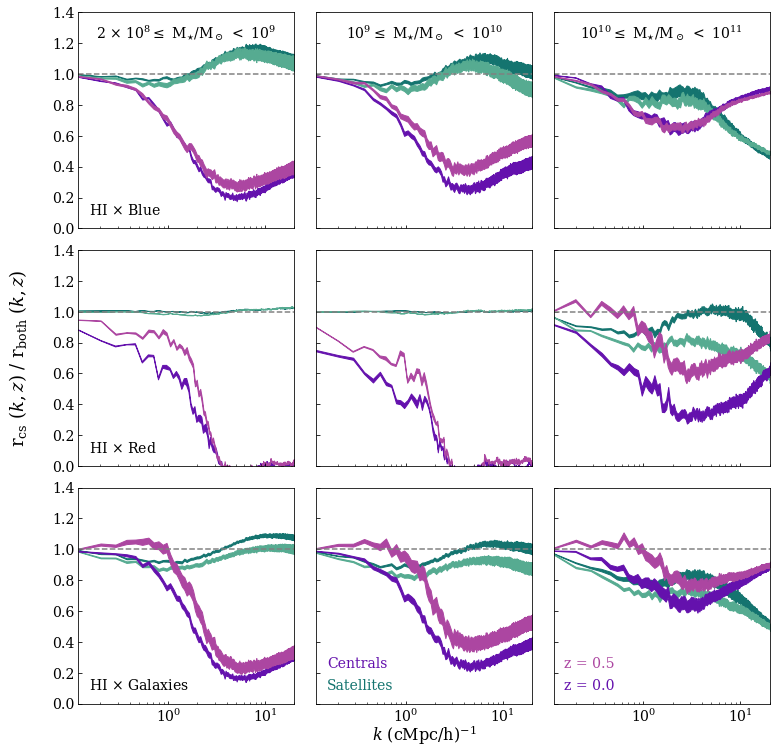

In [77]:
ip = {'is_auto':False, 'censat':['both_satellites', 'both_centrals', 'both'], 'sim_resolution':'high', 'space':'real',
     'grid_resolution':800, 'path':'galbt', 'gal_res':bins, 'color':['blue', 'red', 'resolved'],
     'color_cut':['0.60', 'None'], 'post_process':'corr_coef', 'snapshot':[67, 99], 'HI_fieldname':'hisubhalo'}
fg = ds.figrid('censat', 'color', 'gal_res', ip)
fg.autoNorm({'censat':'both'}, ['model', 'gal_res', 'snapshot'])
censats = ['both_satellites', 'both_centrals']
cslab = ['Satellites', 'Centrals']
cencols = ['#6411ad', '#ac46a1', '#ea698b']
satcols = ['#14746f', '#56ab91', '#99e2b4']
sslab = ['z = 0.0', 'z = 0.5', 'z = 1.0']
cols = ['red', 'blue', 'resolved']
snapshots = ip['snapshot']

for cs in range(len(censats)):
    for ss in range(len(snapshots)):
        kwargs = {}
        if censats[cs] == 'both_satellites':
            kwargs['color'] = satcols[ss]
        elif censats[cs] == 'both_centrals':
            kwargs['color'] = cencols[ss]
#         kwargs['label'] = cslab[cs] + ', ' + sslab[ss]
        
        for cl in cols:
            fg.plotArgs({'censat':censats[cs], 'color':cl, 'snapshot':snapshots[ss]},
                   plot_kwargs = kwargs)
            fg.fill({'censat':censats[cs], 'color':cl, 'snapshot':snapshots[ss]})

for ss in range(len(snapshots)):
    fg.annotatePanel(sslab[ss], (0.05, 0.05 + 0.1*ss), (2,2), color = cencols[ss], fontsize = 14,
                    ha = 'left', va = 'bottom')
for cs in range(len(censats)):
    if cs == 1:
        col = cencols[0]
    if cs == 0:
        col = satcols[0]
    fg.annotatePanel(cslab[cs], (0.05, 0.05 + 0.1*cs), (2,1), color = col, fontsize = 14,
                    ha = 'left', va = 'bottom')
fg.axisArgs(yscale = 'linear', ylim = (0, 1.4))
fg.legendArgs(rm_legend = True)
fg.gspecArgs(hspace = 0.1, wspace = 0.1)
fg.setDefaultTicksParams()
fg.setYLabel(pplib.ccrat("cs", "both", fn = 'k, z'))
fg.setXLabel(pplib.wnum())
fg.plotOnes()
fg.plot()

The row values for snapshot: [99]
The column values for : ['no key found']
The row values for snapshot: [67]
The column values for : ['no key found']
The row values for snapshot: [50]
The column values for : ['no key found']


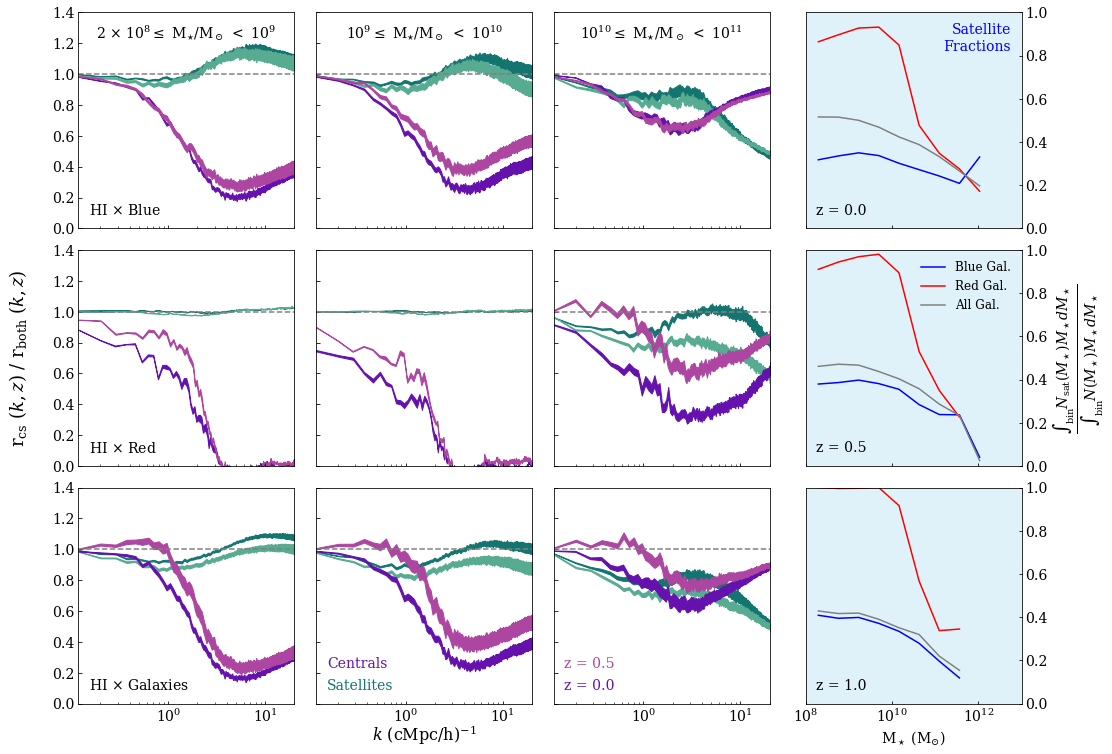

In [78]:
snapshots = [99, 67, 50]
for row in range(len(snapshots)):
    ax = setAx(fg, row, 0.5)
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position('right')
    hists = {'is_hist':True, 'snapshot':snapshots[row], 'fieldname':'galaxy', 'censat':['both', 'satellites']}
    mfg = gdds.figrid('color', 'snapshot', '', hists)
    mfg.plotArgs('red', label = 'Red Gal.', color = 'red')
    mfg.plotArgs('blue', label = 'Blue Gal.', color = 'blue')
    mfg.plotArgs('resolved', label = 'All Gal.', color = 'gray')
    mfg.autoNorm({'censat':'both'}, ['color'])
    mfg.axisArgs(yscale = 'linear', xscale = 'log', xlim = (1e8, 1e13), facecolor = pplib.rgba(STATCOL, 0.25),
                ylim = (0, 1))

    mfg.rowLabels([sslabels[row]], pos = (0.05, 0.05))
    mfg.rowLabelArgs(va = 'bottom', ha = 'left', fontsize = 14)
    mfg.setFunc({}, hist)
    
    mfg.tickArgs(labelsize = 14, direction = 'in')
    if row == len(snapshots) - 1:
        ax.set_xlabel(r"M$_\star$ (M$_{\odot}$)", fontsize = 14)
    else:
        mfg.tickArgs(labelbottom = False)
    
    if row == 1:
        ax.set_ylabel(r"$\frac{\int_{\mathrm{bin}} N_{\mathrm{sat}} (M_\star) M_\star dM_\star}{\int_{\mathrm{bin}} N (M_\star) M_\star dM_\star}$",
             fontsize = 20)
        mfg.legendArgs(frameon = False, loc = 'upper right', fontsize = 12)
    else:
        mfg.legendArgs(rm_legend = True)

    if row == 0:
        mfg.annotatePanel('Satellite\nFractions', (0.95, 0.95), (0,0),
                color = 'blue', fontsize = 14, ha = 'right', va = 'top')
    axarr = np.array([ax], ndmin = 2, dtype = object)
    mfg.plot(fg.fig, axes = axarr)
fg.save("censat.png")
fg.save("/Users/cosinga/code/hicolor_draft/figures/censat.pdf", dpi = 150)
fg.fig